## ***Steps***
- **Defining State**
- **Creating nodes**
- **Connecting edges**

In [1]:
from typing import TypedDict

In [2]:
# Defining State
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [4]:
# Defining nodes to handle state
def calc_total(state:PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.8
    return state


def cvt_total(state:PortfolioState) -> PortfolioState:
    state['total_inr'] = state['amount_usd'] * 85
    return state

In [5]:
# Creating graph
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

In [6]:
# Adding the nodes to the blank graph
builder.add_node('total_calc', calc_total)
builder.add_node('convert_to_inr', cvt_total)

# Connecting nodes through edges
builder.add_edge(START, 'total_calc')
builder.add_edge('total_calc', 'convert_to_inr')
builder.add_edge('convert_to_inr', END)

In [7]:
# Compiling the graph
graph = builder.compile()

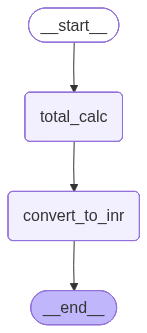

In [ ]:
# Visualising the graph
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Graph workflow result
graph.invoke({'amount_usd': 4000})

{'amount_usd': 4000, 'total_usd': 7200.0, 'total_inr': 340000}